
# **OFFICE INFRASTRUCTURE**


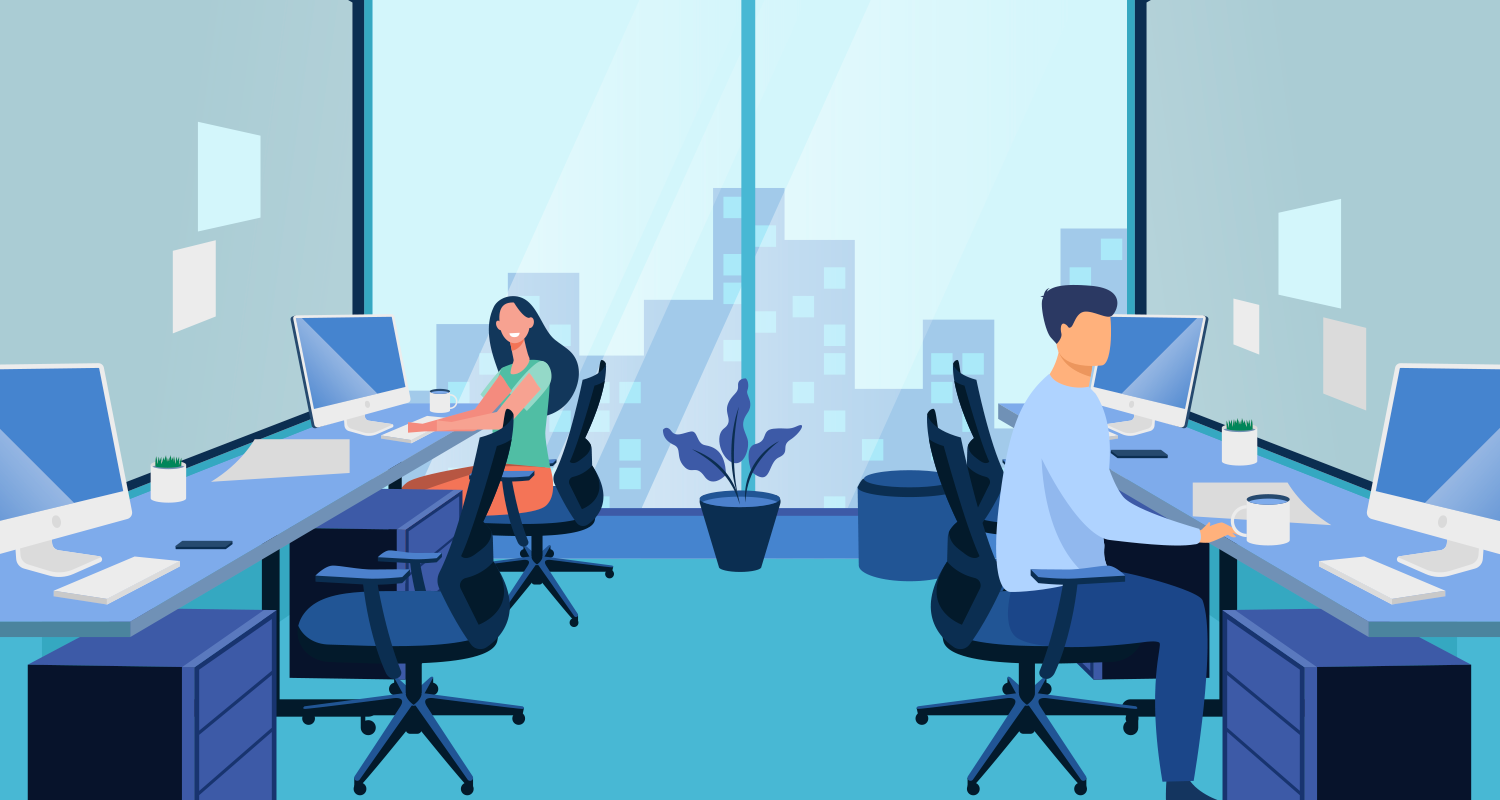

**DESCRIPTION:**The Dataset we have data related to year wise sales and profits along with product category,state wise data,discount related to products and many more attributes.

**OBJECTIVE:**
The company seeks to sustain and boost its year-over-year profit growth. To do this, they want to build a predictive model for gross profit to identify what's driving the growth and maintain it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

df=pd.read_excel("/content/drive/MyDrive/Office Infrastructure (1).xlsx")
df.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
#number of rows is 9426 and columns is 24

df.shape

(9426, 24)

In [5]:
df.describe()#statistical analysis

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


In [6]:
#checking the column wise null values count
#next check the null values presetn in my dataset in product  base margin i have null values i.e 72

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [7]:
#Checking null values

null_columns = df.columns[df.isnull().any()]
null_columns_list = null_columns.tolist()
null_columns_list

['Product Base Margin']

In [10]:
#handling null values

df['Product Base Margin'].fillna(0, inplace=True)
df.isnull().sum().any()

False

In [11]:
# making new column with the name year

df['Year']=df['Ship Date'].dt.year
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,2011
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,2011
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,2011


In [13]:
# filtering the data

a=df[df['Year']!=2014]

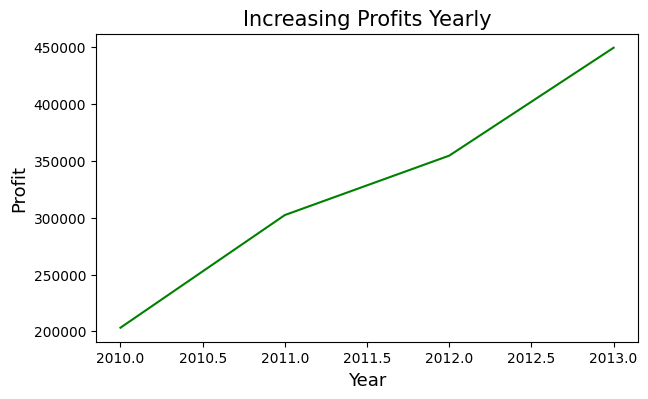

In [14]:
grp_data=a.groupby('Year')['Profit'].sum()
year=grp_data.index
profit=grp_data.values
plt.figure(figsize=(7,4))
plt.plot(year,profit,color='green')
plt.xlabel("Year",fontsize=13)
plt.ylabel("Profit",fontsize=13)
plt.title("Increasing Profits Yearly",fontsize=15)
plt.show()


Our office infrastructure company's profits have been going up each year, and we plan to keep it that way in the future.



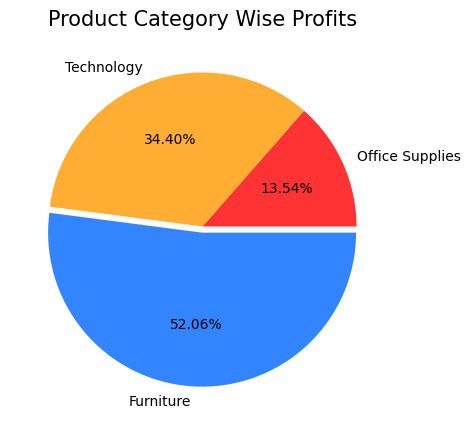

In [15]:
c=list(a['Product Category'].unique())
b=a.groupby('Product Category')['Profit'].sum().reset_index()
plt.figure(figsize=(7,5))
exp=(0,0,0.04)
colors=['#ff3333','#ffad33','#3385ff']
plt.pie(b['Profit'],labels=c,autopct="%1.2f%%",explode=exp,colors=colors)
plt.title("Product Category Wise Profits",fontsize=15)
plt.show()

In terms of product categories, the furniture category has the highest profits compared to the other two. This indicates that furniture products contribute the most to the company's profits.

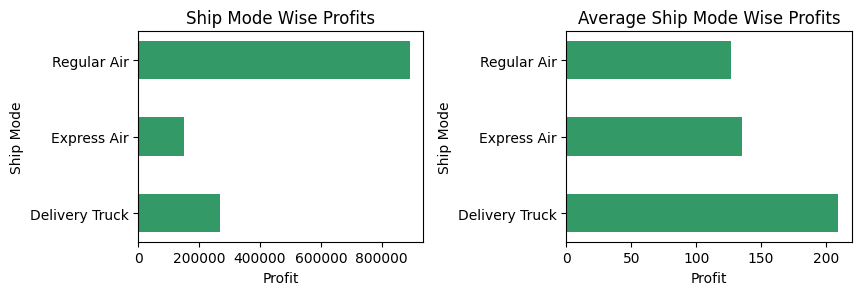

In [16]:
c = a.groupby('Ship Mode')['Profit'].mean()
d = a.groupby('Ship Mode')['Profit'].sum()

# Increase the figure size to a more reasonable value
plt.figure(figsize=(13, 8))  # Adjust the width and height as needed

# Second subplot
plt.subplot(3, 3, 1)  # You can adjust the grid size if necessary
plt.title("Ship Mode Wise Profits")
plt.ylabel("Ship Mode")
plt.xlabel("Profit")
plt.barh(d.index, d.values, height=0.5, color='#339966')

# First subplot
plt.subplot(3, 3, 2)  # You can adjust the grid size if necessary
plt.title("Average Ship Mode Wise Profits")
plt.ylabel("Ship Mode")
plt.xlabel("Profit")
plt.barh(c.index, c.values, height=0.5, color='#339966')
plt.tight_layout()
plt.show()

Overall profits are come from Regular ship mode and average profits are come from Delivery truck

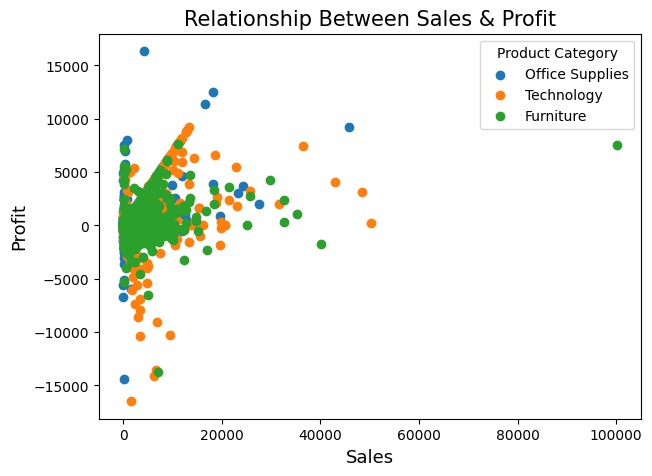

In [17]:
categories = a['Product Category'].unique()

plt.figure(figsize=(7, 5))
plt.title("Relationship Between Sales & Profit", fontsize=15)

# Iterate through categories and plot each category with a different color
for category in categories:
    subset = a[a['Product Category'] == category]
    plt.scatter(subset['Sales'], subset['Profit'], label=category)

plt.xlabel("Sales", fontsize=13)
plt.ylabel("Profit", fontsize=13)
plt.legend(title='Product Category', loc='upper right')  # Add a legend
plt.show()

The relationship between sales and profits is directly proportional. As sales increase, my profits also increase.

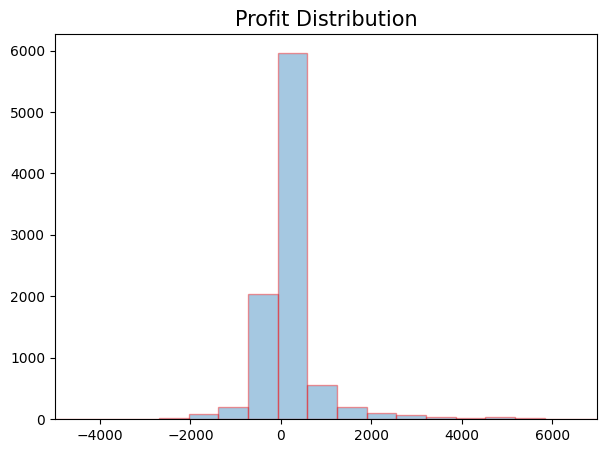

In [18]:
plt.figure(figsize=(7,5))
plt.title("Profit Distribution",fontsize=15)
plt.hist(a['Profit'],bins=50,edgecolor='red',alpha=0.4)
plt.xlim(-5000,7000)
plt.show()

This chart shows how my profits are frequently distributed and my profits ranging between 600 to 1000 and it indicates it is a most common profit level

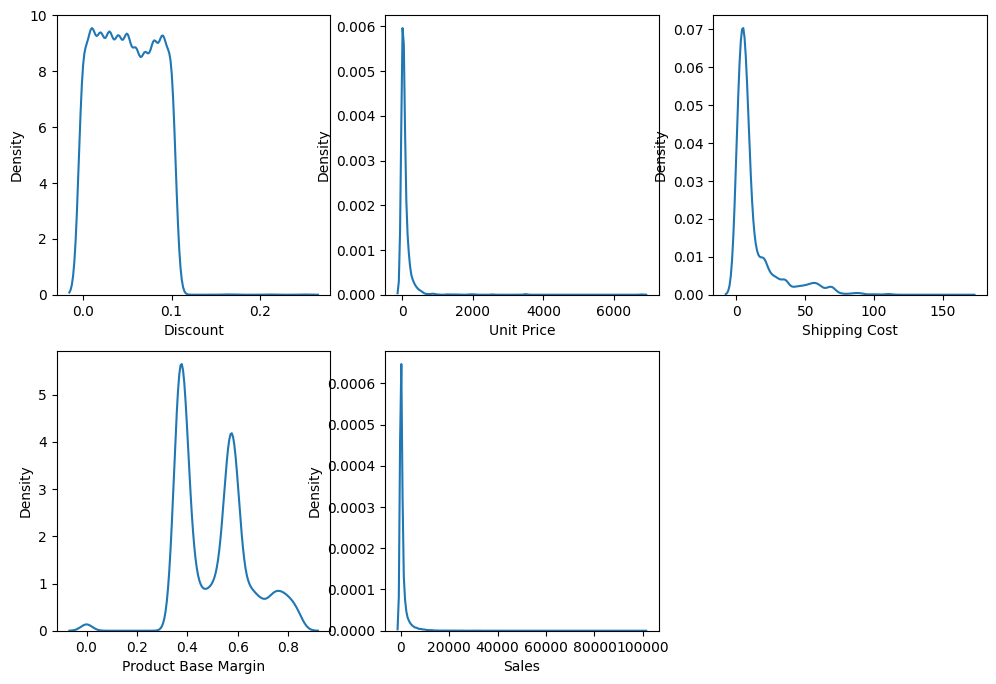

In [19]:
numerical=['Discount','Unit Price','Shipping Cost','Product Base Margin','Sales']

plt.figure(figsize=(12,8))
for i, column in enumerate(numerical,1):
    plt.subplot(2,3,i)
    sns.distplot(a[column], bins=10, kde=True, hist=False, hist_kws={"edgecolor": "black", "alpha": 0.5})
    plt.xlabel(column)

* Here we can see the overall distribution of numerical columns over the dataset

* The frequent discount rates range from 0.00 to 0.03, while sales range from 500 to 10,000, and the product base margin falls between 0.3 and 0.4.

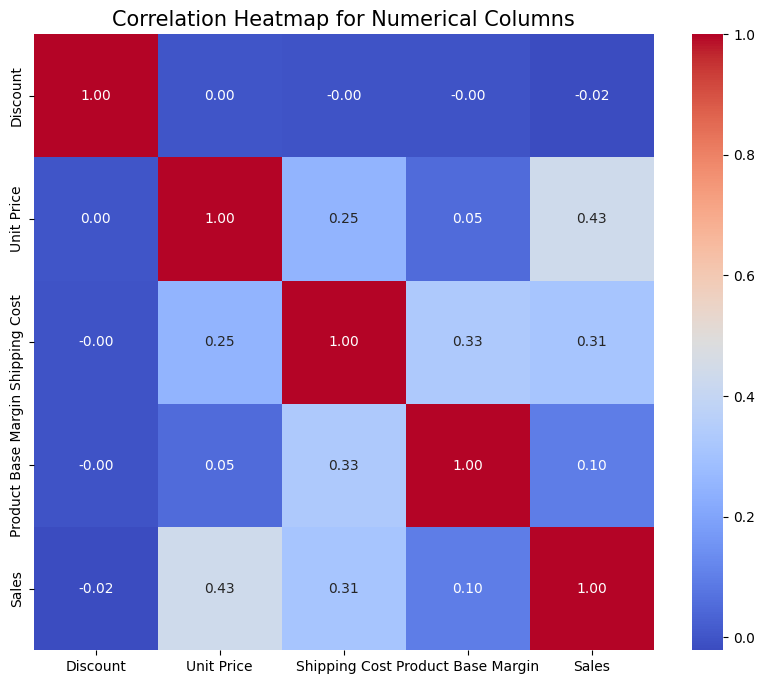

In [20]:
numerical = ['Discount', 'Unit Price', 'Shipping Cost', 'Product Base Margin', 'Sales']
correlation_matrix = a[numerical].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Columns", fontsize=15)
plt.show()

There is no correlation between any dependent variables so we can say that there is no multicollinearity between dependent variables.

for how many states you want to see the profits :5


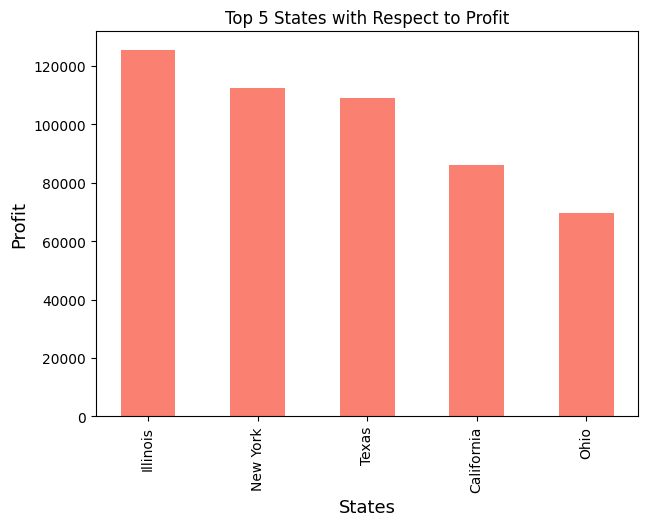

In [21]:
b=a.groupby('State or Province')['Profit'].sum().reset_index()
c=b.sort_values(by='Profit',ascending=False)
e=int(input("for how many states you want to see the profits :"))
d=c.head(e)
plt.figure(figsize=(7,5))
plt.xticks(rotation='vertical')
plt.title(f"Top {e} States with Respect to Profit")
plt.xlabel("States",fontsize=13)
plt.ylabel("Profit",fontsize=13)
plt.bar(d['State or Province'],d['Profit'],color='#fa8072',width=0.5)
plt.show()

This chart represents the top 5 states with respect to profits. If we focus on these 5 states and increase advertising efforts for our products, we can potentially boost profits.

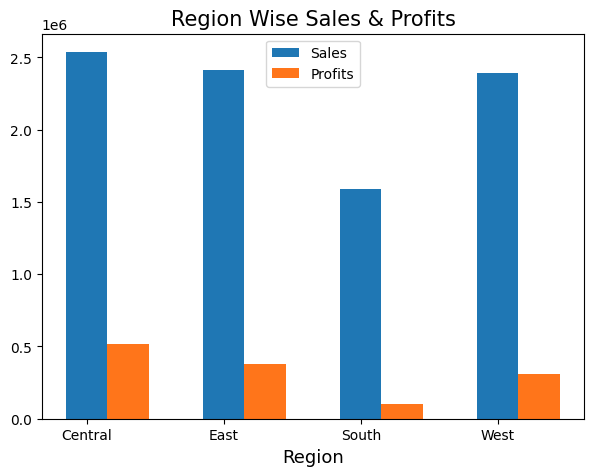

In [22]:
b=a.groupby('Region')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize=(7,5))
plt.title("Region Wise Sales & Profits",fontsize=15)
plt.xlabel("Region",fontsize=13)
width=0.3
c=np.arange(len(b['Region']))
plt.xticks(c,['Central','East','South','West'])
plt.bar(c,b['Sales'],label="Sales",width=width)
plt.bar(c+0.3,b['Profit'],label="Profits",width=width,color='#ff751a')
plt.legend()
plt.show()

In terms of region-wise sales and profits, the central region outperforms the other three regions in both sales and profits, indicating that higher sales correlate with greater profits.

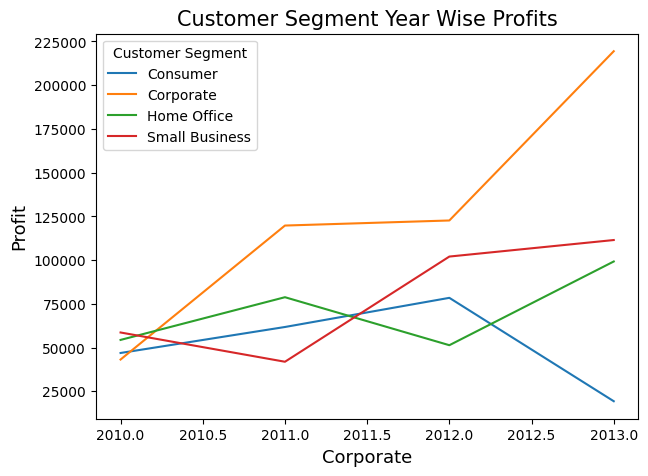

In [23]:
g=a.groupby(['Customer Segment','Year'])['Profit'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(x='Year',y='Profit',hue='Customer Segment',data=g)
plt.title("Customer Segment Year Wise Profits",fontsize=15)
plt.xlabel("Corporate",fontsize=13)
plt.ylabel("Profit",fontsize=13)
plt.show()

This chart represents the customer segment of corporate. Yearly profits are increasing, indicating that targeting corporate companies for selling our products can lead to future profit growth.

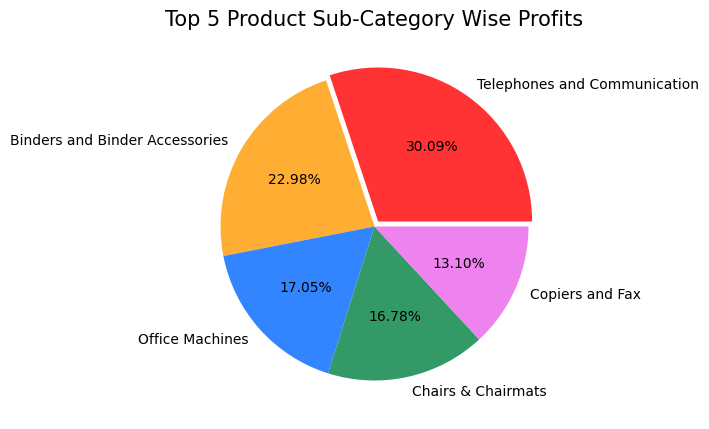

In [24]:
b=a.groupby('Product Sub-Category')['Profit'].sum().reset_index()
d=b.sort_values(by="Profit",ascending=False)
c=d.head()
plt.figure(figsize=(7,5))
exp=(0.04,0,0,0,0)
colors=['#ff3333','#ffad33','#3385ff','#339966','violet']
plt.title("Top 5 Product Sub-Category Wise Profits",fontsize=15)
plt.pie(c['Profit'],labels=c['Product Sub-Category'],autopct="%1.2f%%",colors=colors,explode=exp)
plt.show()

In this chart, the top 5 product subcategories contribute the most profits, with telephones and communication contributing more profits compared to others.

# **Machine Learning**

In [25]:
categorical_cols = ['Order Priority', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Container']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [26]:
df.shape

(9426, 52)

Feature Engineering

In [27]:
df['Total Cost'] = df['Discount'] + df['Unit Price'] + df['Shipping Cost']
df['Total Revenue'] = df['Quantity ordered new'] * df['Unit Price']
df['Gross Profit'] = df['Total Revenue'] - df['Total Cost']
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Month'] = df['Order Date'].dt.month
df['Ship Month'] = df['Ship Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.dayofweek
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek
df['Order Year'] = df['Order Date'].dt.year

In [37]:
df.isnull().sum().any()

False

There are no null values are present in columns

In [29]:
#assiging features and targets to the variable

features = [
    'Discount', 'Unit Price', 'Shipping Cost', 'Quantity ordered new',
    'Product Base Margin', 'Order Month', 'Ship Month', 'Order Day of Week',
    'Ship Day of Week', 'Order Year', 'Sales'
]

target = 'Gross Profit'

In [30]:
#splitting the data

x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

splitting the dataset into train and test data in an 80:20 ratio.

In [31]:
#scaling the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

performing scaling on the train and test dataset

In [32]:

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(7540, 11)
(7540,)
(1886, 11)
(1886,)


In [33]:
#train the model

model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

Training the model using linear regression

In [34]:
#predict the model

y_train_pred=model.predict(x_train_scaled)
y_pred = model.predict(x_test_scaled)

Predicting the gross profit

In [35]:
print("score of train",model.score(x_train_scaled, y_train))
print("score of test",model.score(x_test_scaled, y_test))


score of train 0.994375810166512
score of test 0.9912545653317267


**CONCLUSION:**

* Furniture Category: Continue promoting furniture products for increasing the sales.

* Product Sub-Category: Continue promoting the product sub-categories of chairs, office machines, copiers and fax machines, and binders for increasing the sales.

* Corporate Customer Segment: Nurture relationships with corporate clients to sustain their business.

* Central Region: Invest in advertising here to boost sales.

* Regular Air Shipping: Use this shipping mode to deliver orders promptly and satisfy customers.

* Discount Strategy: Implement discounts on furniture items to attract more buyers.


LinearRegression Model performing really well, scoring 99.4% on the training data and 99.1% on the test data. This means it's good at making accurate predictions